In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
csat_score_df = pd.read_csv('csat_score_data.csv')

In [74]:
csat_score_df.head()

,LEASE_ID,CSAT_RATING,ATLAS_REGION,BEDROOMS,BATHROOMS,FIRST_LEASE_APPROVED_AT,LEASE_START,LEAD_DAYS,BOOKING_TYPE,LOS,SOURCE_CATEGORY,HAS_EXTENSION,HAS_RELOCATION
0,1,5,San Francisco,0,1.0,2020-02-27 07:04:04.176 +0000,2020-03-04,7,Regular,9,Repeat,0,0
1,2,4,Seattle,3,2.5,2020-02-26 18:32:53.664 +0000,2020-03-03,6,Instant Fully Paid,31,Search,0,0
2,3,5,San Francisco,1,1.0,2020-03-01 02:03:53.280 +0000,2020-03-04,5,Regular,33,B2B,0,0
3,4,5,Los Angeles,1,1.0,2020-02-29 03:30:47.240 +0000,2020-03-08,9,Regular,329,B2B,1,0
4,5,5,Los Angeles,2,2.0,2020-02-29 20:02:58.692 +0000,2020-03-07,7,Instant Fully Paid,33,Paid Ads,0,0


# Regions

In [21]:
cities = csat_score_df.groupby(["ATLAS_REGION"])["CSAT_RATING"].mean()
cities

ATLAS_REGION
Boston           4.375000
Los Angeles      4.372881
New York City    4.100000
San Francisco    3.903614
San Jose         3.675926
Seattle          4.228571
Washington DC    4.235294
Name: CSAT_RATING, dtype: float64

Text(0.5, 1.0, 'CSAT Rating Per Region')

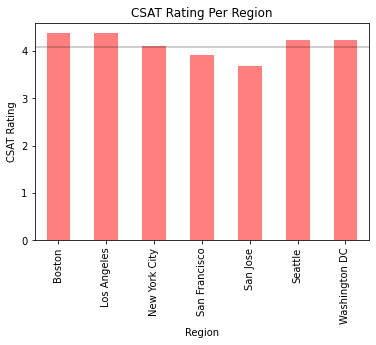

In [83]:
cities.plot(kind="bar", color="r", alpha=0.5)
plt.hlines(y=4.076, xmin=-1, xmax=9, alpha=0.25)
plt.ylabel("CSAT Rating")
plt.xlabel("Region")
plt.title("CSAT Rating Per Region")

Text(0, 0.5, ' ')

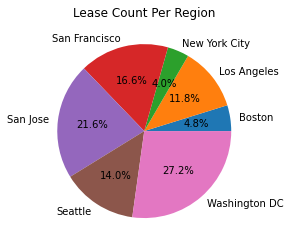

In [93]:
df = csat_score_df.groupby(["ATLAS_REGION"])["CSAT_RATING"].count()
df.plot(kind="pie", autopct="%1.1f%%")
# plt.pie()
plt.title("Lease Count Per Region")
# plt.xlabel(" ")
plt.ylabel(" ")

#### Observation
- The average CSAT rating at bay area(San Francisco and San Jose) is lower than the averate CSAT rating of whole leasing. 
- bay area(San Francisco and San Jose) accounts for 38% of all leases.
- Improving the CSAT rating at bay area would increase the overall CSAT rating

# Bathrooms

Text(0, 0.5, 'CSAT rating')

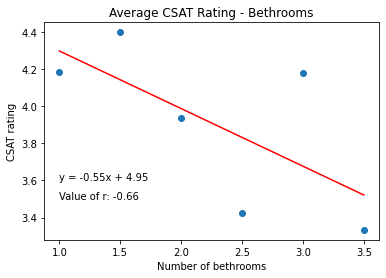

In [182]:
bethrooms = csat_score_df.groupby(["BATHROOMS"])["CSAT_RATING"].mean().reset_index()
x = bethrooms["BATHROOMS"]
y = bethrooms["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
ling_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(1.0, 3.6))
plt.annotate(f"Value of r: {round(rvalue,2)}", xy=(1.0, 3.5))
# print(f"Value of r: {rvalue}")
plt.title("Average CSAT Rating - Bethrooms")
plt.xlabel("Number of bethrooms")
plt.ylabel("CSAT rating")


#### Observation:
- The rvalue is -0.66.
- The CSAT rating and numbers of bethrooms has moderate correlation.
- The more bethrooms the lower CSAT rating.

Text(0, 0.5, 'Lease Count')

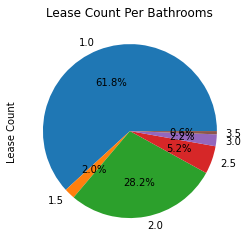

In [120]:
# Lease count per bedrooms
csat_score_df.groupby(["BATHROOMS"])["CSAT_RATING"].count().plot(kind="pie", autopct="%1.1f%%")
plt.title("Lease Count Per Bathrooms")
plt.ylabel("Lease Count")

#### Since the units with 4 or 5 bathrooms account for less than 3%, let do analysis on the units with less than 4 bathrooms¶

Value of r: -0.8458718656402743


Text(0, 0.5, 'CSAT rating')

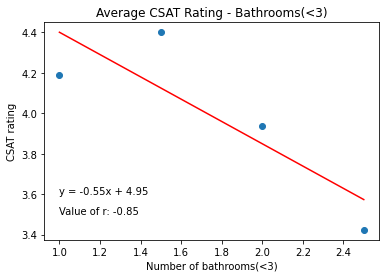

In [181]:
filter = csat_score_df["BATHROOMS"] < 3
df = csat_score_df[filter].groupby(["BATHROOMS"])["CSAT_RATING"].mean().reset_index()
x = df["BATHROOMS"]
y = df["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(1.0, 3.6))
plt.annotate(f"Value of r: {round(rvalue,2)}", xy=(1.0, 3.5))
# print(f"Value of r: {rvalue}")
plt.title("Average CSAT Rating - Bathrooms(<3)")
plt.xlabel("Number of bathrooms(<3)")
plt.ylabel("CSAT rating")

### Observation:
- The rvalue is -0.84.
- When bathroom is less than 3, The CSAT rating and numbers of bedrooms has strong correlation.
- The more bathrooms, the lower CSAT rating.

# Bedrooms

Text(0, 0.5, 'CSAT rating')

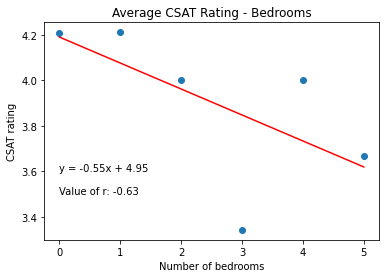

In [184]:
bethrooms = csat_score_df.groupby(["BEDROOMS"])["CSAT_RATING"].mean().reset_index()
x = bethrooms["BEDROOMS"]
y = bethrooms["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
ling_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(0, 3.6))
plt.annotate(f"Value of r: {round(rvalue,2)}", xy=(0, 3.5))
# print(f"Value of r: {rvalue}")
plt.title("Average CSAT Rating - Bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("CSAT rating")


### Observation:
- The rvalue is -0.62.
- The CSAT rating and numbers of bedrooms has moderate correlation.
- The more bedrooms, the lower CSAT rating.

Text(0, 0.5, 'Lease Count')

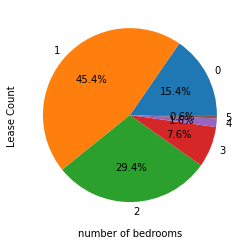

In [112]:
# Lease count per bedrooms
csat_score_df.groupby(["BEDROOMS"])["CSAT_RATING"].count().plot(kind="pie", autopct="%1.1f%%")
plt.title("Lease Count Per Bedrooms")
plt.ylabel("Lease Count")

#### Since the units with 4 or 5 bedrooms account for less than 3%, let do analysis on the units with less than 4 bedrooms 

Value of r: -0.8824327598047067


Text(0, 0.5, 'CSAT rating')

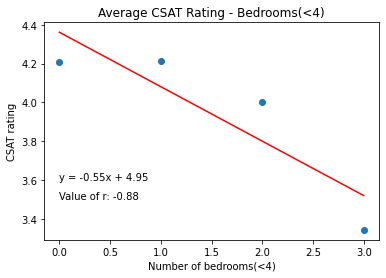

In [185]:
filter = csat_score_df["BEDROOMS"] < 4
df = csat_score_df[filter].groupby(["BEDROOMS"])["CSAT_RATING"].mean().reset_index()
x = df["BEDROOMS"]
y = df["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
ling_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(0, 3.6))
plt.annotate(f"Value of r: {round(rvalue,2)}", xy=(0, 3.5))
print(f"Value of r: {rvalue}")
plt.title("Average CSAT Rating - Bedrooms(<4)")
plt.xlabel("Number of bedrooms(<4)")
plt.ylabel("CSAT rating")


#### Observation:
- The rvalue is -0.88.
- When bedroom is less than 4, The CSAT rating and numbers of bedrooms has strong correlation.
- The more bedrooms, the lower CSAT rating.

# LEAD_DAYS

Text(0, 0.5, 'CSAT rating')

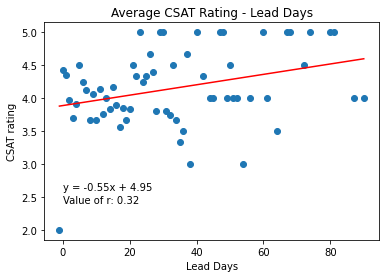

In [187]:
df = csat_score_df.groupby(["LEAD_DAYS"])["CSAT_RATING"].mean().reset_index()
x = df["LEAD_DAYS"]
y = df["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
ling_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(0, 2.6))
plt.annotate(f"Value of r: {round(rvalue,2)}", xy=(0, 2.4))
# print(f"Value of r: {rvalue}")
plt.title("Average CSAT Rating - Lead Days")
plt.xlabel("Lead Days")
plt.ylabel("CSAT rating")

#### Observation:
- r value is 0.319
- The CSAT Rating and Lead days have weak correlation.

# LOS

Text(0, 0.5, 'CSAT rating')

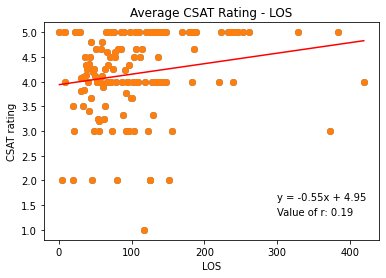

In [190]:
los = csat_score_df.groupby(["LOS"])["CSAT_RATING"].mean()
los = los.reset_index()
plt.scatter(los["LOS"], los["CSAT_RATING"])

df = csat_score_df.groupby(["LOS"])["CSAT_RATING"].mean().reset_index()
x = df["LOS"]
y = df["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
ling_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(300, 1.6))
plt.annotate(f"Value of r: {round(rvalue,2)}", xy=(300, 1.3))
# print(f"Value of r: {rvalue}")
plt.title("Average CSAT Rating - LOS")
plt.xlabel("LOS")
plt.ylabel("CSAT rating")

#### Observation
- r value is 0.189
- There is almost no correlation between CSAT rating and LOS.

# Source Category

Text(0, 0.5, 'Source Category')

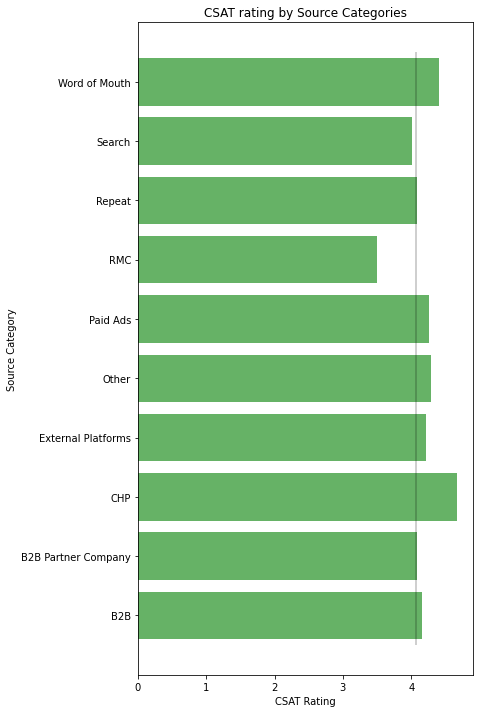

In [178]:
sources = csat_score_df.groupby(["SOURCE_CATEGORY"]).mean()
# sources = sources.reset_index()
sources["count"] = csat_score_df.groupby(["SOURCE_CATEGORY"])["CSAT_RATING"].count()
sources = sources[["CSAT_RATING", "count"]]
sources = sources.reset_index()
plt.figure(figsize=(6, 12))
# plt.bar( sources["CSAT_RATING"], width=sources["count"])
plt.barh(sources["SOURCE_CATEGORY"], sources["CSAT_RATING"], color="g", alpha=0.6)
plt.vlines(x=4.076, ymin=-0.50, ymax=9.5, alpha=0.25)
plt.title("CSAT rating by Source Categories")
plt.xlabel("CSAT Rating")
plt.ylabel("Source Category")

Text(0, 0.5, '')

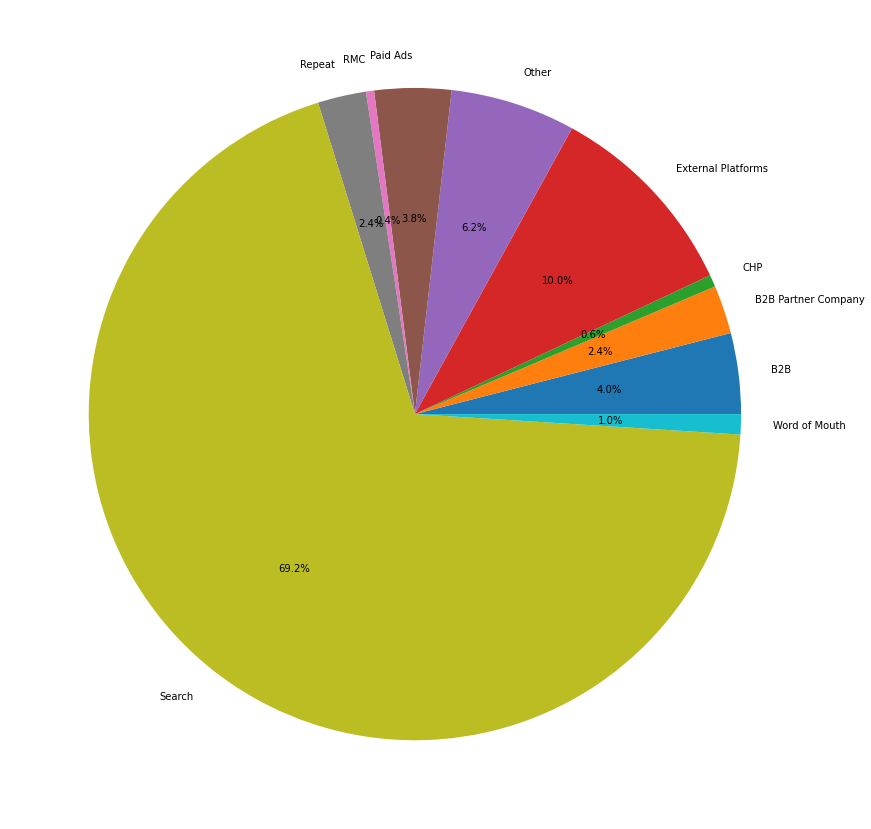

In [158]:
plt.figure(figsize=(15, 15))

csat_score_df.groupby(["SOURCE_CATEGORY"])["CSAT_RATING"].count().plot(kind="pie", autopct="%1.1f%%", )

plt.ylabel("")

#### Oberservation
- Most source categories except search have CSAT rating above average.
- Search category takes about 70% of leases. 
- Improvement on the rating of Search category would contribute the overall CSAT rating improvement.
- Most categories except search might have influence on the residentt either through advertisement or good words before lease or follow up after check-in.
- We might provide a good introduction about the service and unit during the lease approval process or a nice follow up after check in for the clients from search category.

# Has_relocation

Text(0, 0.5, 'AVG_CSAT_RATING')

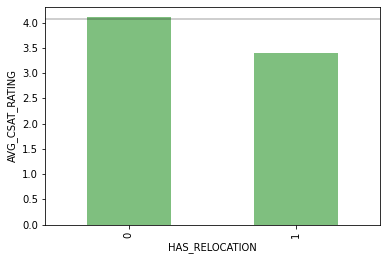

In [192]:
csat_score_df.groupby(["HAS_RELOCATION"])["CSAT_RATING"].mean().plot(kind="bar", color='g', alpha=0.5)
plt.hlines(y=4.076, xmin=-1, xmax=3, alpha=0.25)
plt.ylabel("AVG_CSAT_RATING")

#### Observation
- Relocation has a negative impact on CSAT rating.
- Be sure to have good follow-ups on the clients who were relocated.

# Has extension

Text(0, 0.5, 'AVG_CSAT_RATING')

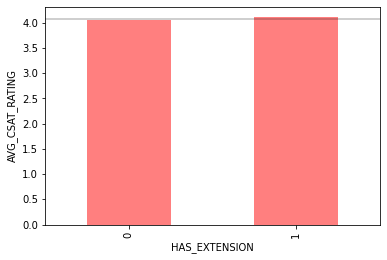

In [193]:
csat_score_df.groupby(["HAS_EXTENSION"])["CSAT_RATING"].mean().plot(kind="bar", color="r", alpha=0.5)
plt.hlines(y=4.076, xmin=-1, xmax=3, alpha=0.25)
plt.ylabel("AVG_CSAT_RATING")

Text(0, 0.5, '')

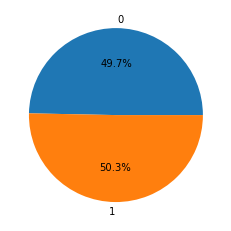

In [142]:
csat_score_df.groupby(["HAS_EXTENSION"])["CSAT_RATING"].mean().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")

#### Observation
- About 50% leases have been extended.
- Clients who extended their lease tend to give better rating.